### 1. Data Exploration

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('covid/metadata.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 17 columns):
Patientid         158 non-null int64
offset            119 non-null float64
sex               140 non-null object
age               132 non-null float64
finding           158 non-null object
survival          60 non-null object
view              158 non-null object
modality          158 non-null object
date              158 non-null object
location          139 non-null object
filename          158 non-null object
doi               76 non-null object
 url              158 non-null object
license           37 non-null object
clinical notes    156 non-null object
other notes       83 non-null object
Unnamed: 16       1 non-null object
dtypes: float64(2), int64(1), object(14)
memory usage: 21.1+ KB


In [4]:
data.head(n=5)

,Patientid,offset,sex,age,finding,survival,view,modality,date,location,filename,doi,url,license,clinical notes,other notes,Unnamed: 16
0,2,0.0,M,65.0,COVID-19,Y,PA,X-ray,"January 22, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",auntminnie-a-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,infiltrate in the upper lobe of the left lung,NaN,NaN
1,2,3.0,M,65.0,COVID-19,Y,PA,X-ray,"January 25, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",auntminnie-b-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,progressive infiltrate and consolidation,NaN,NaN
2,2,5.0,M,65.0,COVID-19,Y,PA,X-ray,"January 27, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",auntminnie-c-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,progressive infiltrate and consolidation,NaN,NaN
3,2,6.0,M,65.0,COVID-19,Y,PA,X-ray,"January 28, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",auntminnie-d-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,progressive infiltrate and consolidation,NaN,NaN
4,4,0.0,F,52.0,COVID-19,NaN,PA,X-ray,"January 25, 2020","Changhua Christian Hospital, Changhua City, Ta...",nejmc2001573_f1a.jpeg,10.1056/NEJMc2001573,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,diffuse infiltrates in the bilateral lower lungs,NaN,NaN


In [5]:
data.describe()

,Patientid,offset,age
count,158.000000,119.000000,132.000000
mean,39.487342,8.638655,53.303030
std,24.508347,7.268146,15.062181
min,2.000000,0.000000,12.000000
25%,18.250000,4.000000,43.000000
50%,35.500000,7.000000,55.000000
75%,62.750000,10.000000,65.000000
max,86.000000,32.000000,87.000000


In [6]:
#Looking at important features.
df_main = data[['age','sex','finding','survival']]
df_main.head()

,age,sex,finding,survival
0,65.0,M,COVID-19,Y
1,65.0,M,COVID-19,Y
2,65.0,M,COVID-19,Y
3,65.0,M,COVID-19,Y
4,52.0,F,COVID-19,NaN


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [8]:
df_main['sex'].value_counts()

M    87
F    53
Name: sex, dtype: int64

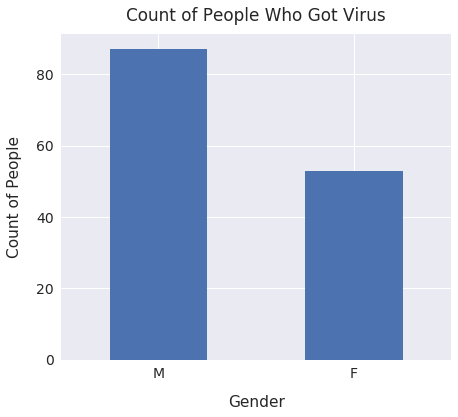

In [9]:
sns.set(font_scale=1.4)
df_main['sex'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Gender", labelpad=14)
plt.ylabel("Count of People", labelpad=14)
plt.title("Count of People Who Got Virus", y=1.02);

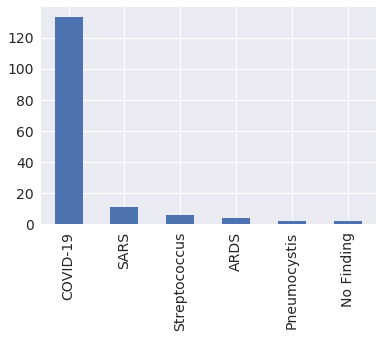

In [10]:
df_main['finding'].value_counts().plot(kind='bar');

- As this dataset is highly imbalanced due to more COVID-19 cases. I will add some images of Normal X-Ray from another dataset.

In [11]:
#taking only COVID-19 images for current dataset of covid.
df_main_covid = data[(data['finding'] == 'COVID-19')]

In [12]:
df_main_covid.head(n=5)

,Patientid,offset,sex,age,finding,survival,view,modality,date,location,filename,doi,url,license,clinical notes,other notes,Unnamed: 16
0,2,0.0,M,65.0,COVID-19,Y,PA,X-ray,"January 22, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",auntminnie-a-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,infiltrate in the upper lobe of the left lung,NaN,NaN
1,2,3.0,M,65.0,COVID-19,Y,PA,X-ray,"January 25, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",auntminnie-b-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,progressive infiltrate and consolidation,NaN,NaN
2,2,5.0,M,65.0,COVID-19,Y,PA,X-ray,"January 27, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",auntminnie-c-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,progressive infiltrate and consolidation,NaN,NaN
3,2,6.0,M,65.0,COVID-19,Y,PA,X-ray,"January 28, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",auntminnie-d-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,progressive infiltrate and consolidation,NaN,NaN
4,4,0.0,F,52.0,COVID-19,NaN,PA,X-ray,"January 25, 2020","Changhua Christian Hospital, Changhua City, Ta...",nejmc2001573_f1a.jpeg,10.1056/NEJMc2001573,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,diffuse infiltrates in the bilateral lower lungs,NaN,NaN


In [13]:
#filling NaN
df_main_covid = df_main_covid.fillna('UnKnown')

In [14]:
df_main_covid.head(n=5)

,Patientid,offset,sex,age,finding,survival,view,modality,date,location,filename,doi,url,license,clinical notes,other notes,Unnamed: 16
0,2,0,M,65,COVID-19,Y,PA,X-ray,"January 22, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",auntminnie-a-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,UnKnown,infiltrate in the upper lobe of the left lung,UnKnown,UnKnown
1,2,3,M,65,COVID-19,Y,PA,X-ray,"January 25, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",auntminnie-b-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,UnKnown,progressive infiltrate and consolidation,UnKnown,UnKnown
2,2,5,M,65,COVID-19,Y,PA,X-ray,"January 27, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",auntminnie-c-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,UnKnown,progressive infiltrate and consolidation,UnKnown,UnKnown
3,2,6,M,65,COVID-19,Y,PA,X-ray,"January 28, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",auntminnie-d-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,UnKnown,progressive infiltrate and consolidation,UnKnown,UnKnown
4,4,0,F,52,COVID-19,UnKnown,PA,X-ray,"January 25, 2020","Changhua Christian Hospital, Changhua City, Ta...",nejmc2001573_f1a.jpeg,10.1056/NEJMc2001573,https://www.nejm.org/doi/full/10.1056/NEJMc200...,UnKnown,diffuse infiltrates in the bilateral lower lungs,UnKnown,UnKnown


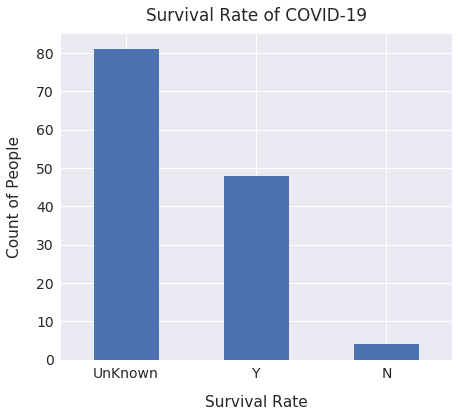

In [15]:
sns.set(font_scale=1.4)
df_main_covid['survival'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Survival Rate", labelpad=14)
plt.ylabel("Count of People", labelpad=14)
plt.title("Survival Rate of COVID-19", y=1.02);

### 2. Machine Learning 

In [2]:
from fastai.vision import *

- Creating a DataFrame from another dataset to mix some Negative(Normal x-ray) Images

In [17]:
input_path = Path('chest_xray/test/NORMAL/') 
fnames = get_image_files(input_path)


fnames = map(lambda x: ['NORMAL', x], fnames)
normal_xray_df = pd.DataFrame(fnames, columns=['finding', 'filename'])

In [18]:
normal_xray_df.head(n=5)

,finding,filename
0,NORMAL,chest_xray/test/NORMAL/NORMAL2-IM-0321-0001.jpeg
1,NORMAL,chest_xray/test/NORMAL/IM-0063-0001.jpeg
2,NORMAL,chest_xray/test/NORMAL/NORMAL2-IM-0322-0001.jpeg
3,NORMAL,chest_xray/test/NORMAL/NORMAL2-IM-0129-0001.jpeg
4,NORMAL,chest_xray/test/NORMAL/NORMAL2-IM-0246-0001-00...


In [19]:
df_main_covid = df_main_covid[['finding','filename']]
df_main_covid.head(n=5)

,finding,filename
0,COVID-19,auntminnie-a-2020_01_28_23_51_6665_2020_01_28_...
1,COVID-19,auntminnie-b-2020_01_28_23_51_6665_2020_01_28_...
2,COVID-19,auntminnie-c-2020_01_28_23_51_6665_2020_01_28_...
3,COVID-19,auntminnie-d-2020_01_28_23_51_6665_2020_01_28_...
4,COVID-19,nejmc2001573_f1a.jpeg


In [20]:
input_path = Path('covid') 

def makeFilename(x = ''):
    return input_path/f'images/{x}'

df_main_covid['filename'] = df_main_covid['filename'].apply(makeFilename)
df_main_covid = df_main_covid[['finding', 'filename']]

In [21]:
df_main_covid.head()

,finding,filename
0,COVID-19,covid/images/auntminnie-a-2020_01_28_23_51_666...
1,COVID-19,covid/images/auntminnie-b-2020_01_28_23_51_666...
2,COVID-19,covid/images/auntminnie-c-2020_01_28_23_51_666...
3,COVID-19,covid/images/auntminnie-d-2020_01_28_23_51_666...
4,COVID-19,covid/images/nejmc2001573_f1a.jpeg


In [22]:
#creating an empty main DataFrame

df_main = pd.DataFrame(data = [], columns=['finding', 'filename'])

In [23]:
#appending the two DataFrame of NORMAL and COVID X-rays.

df_main = df_main.append([df_main_covid, normal_xray_df], ignore_index=True)
df_main.head(n=5)

,finding,filename
0,COVID-19,covid/images/auntminnie-a-2020_01_28_23_51_666...
1,COVID-19,covid/images/auntminnie-b-2020_01_28_23_51_666...
2,COVID-19,covid/images/auntminnie-c-2020_01_28_23_51_666...
3,COVID-19,covid/images/auntminnie-d-2020_01_28_23_51_666...
4,COVID-19,covid/images/nejmc2001573_f1a.jpeg


In [2]:
from fastai.vision import *
from PIL import Image

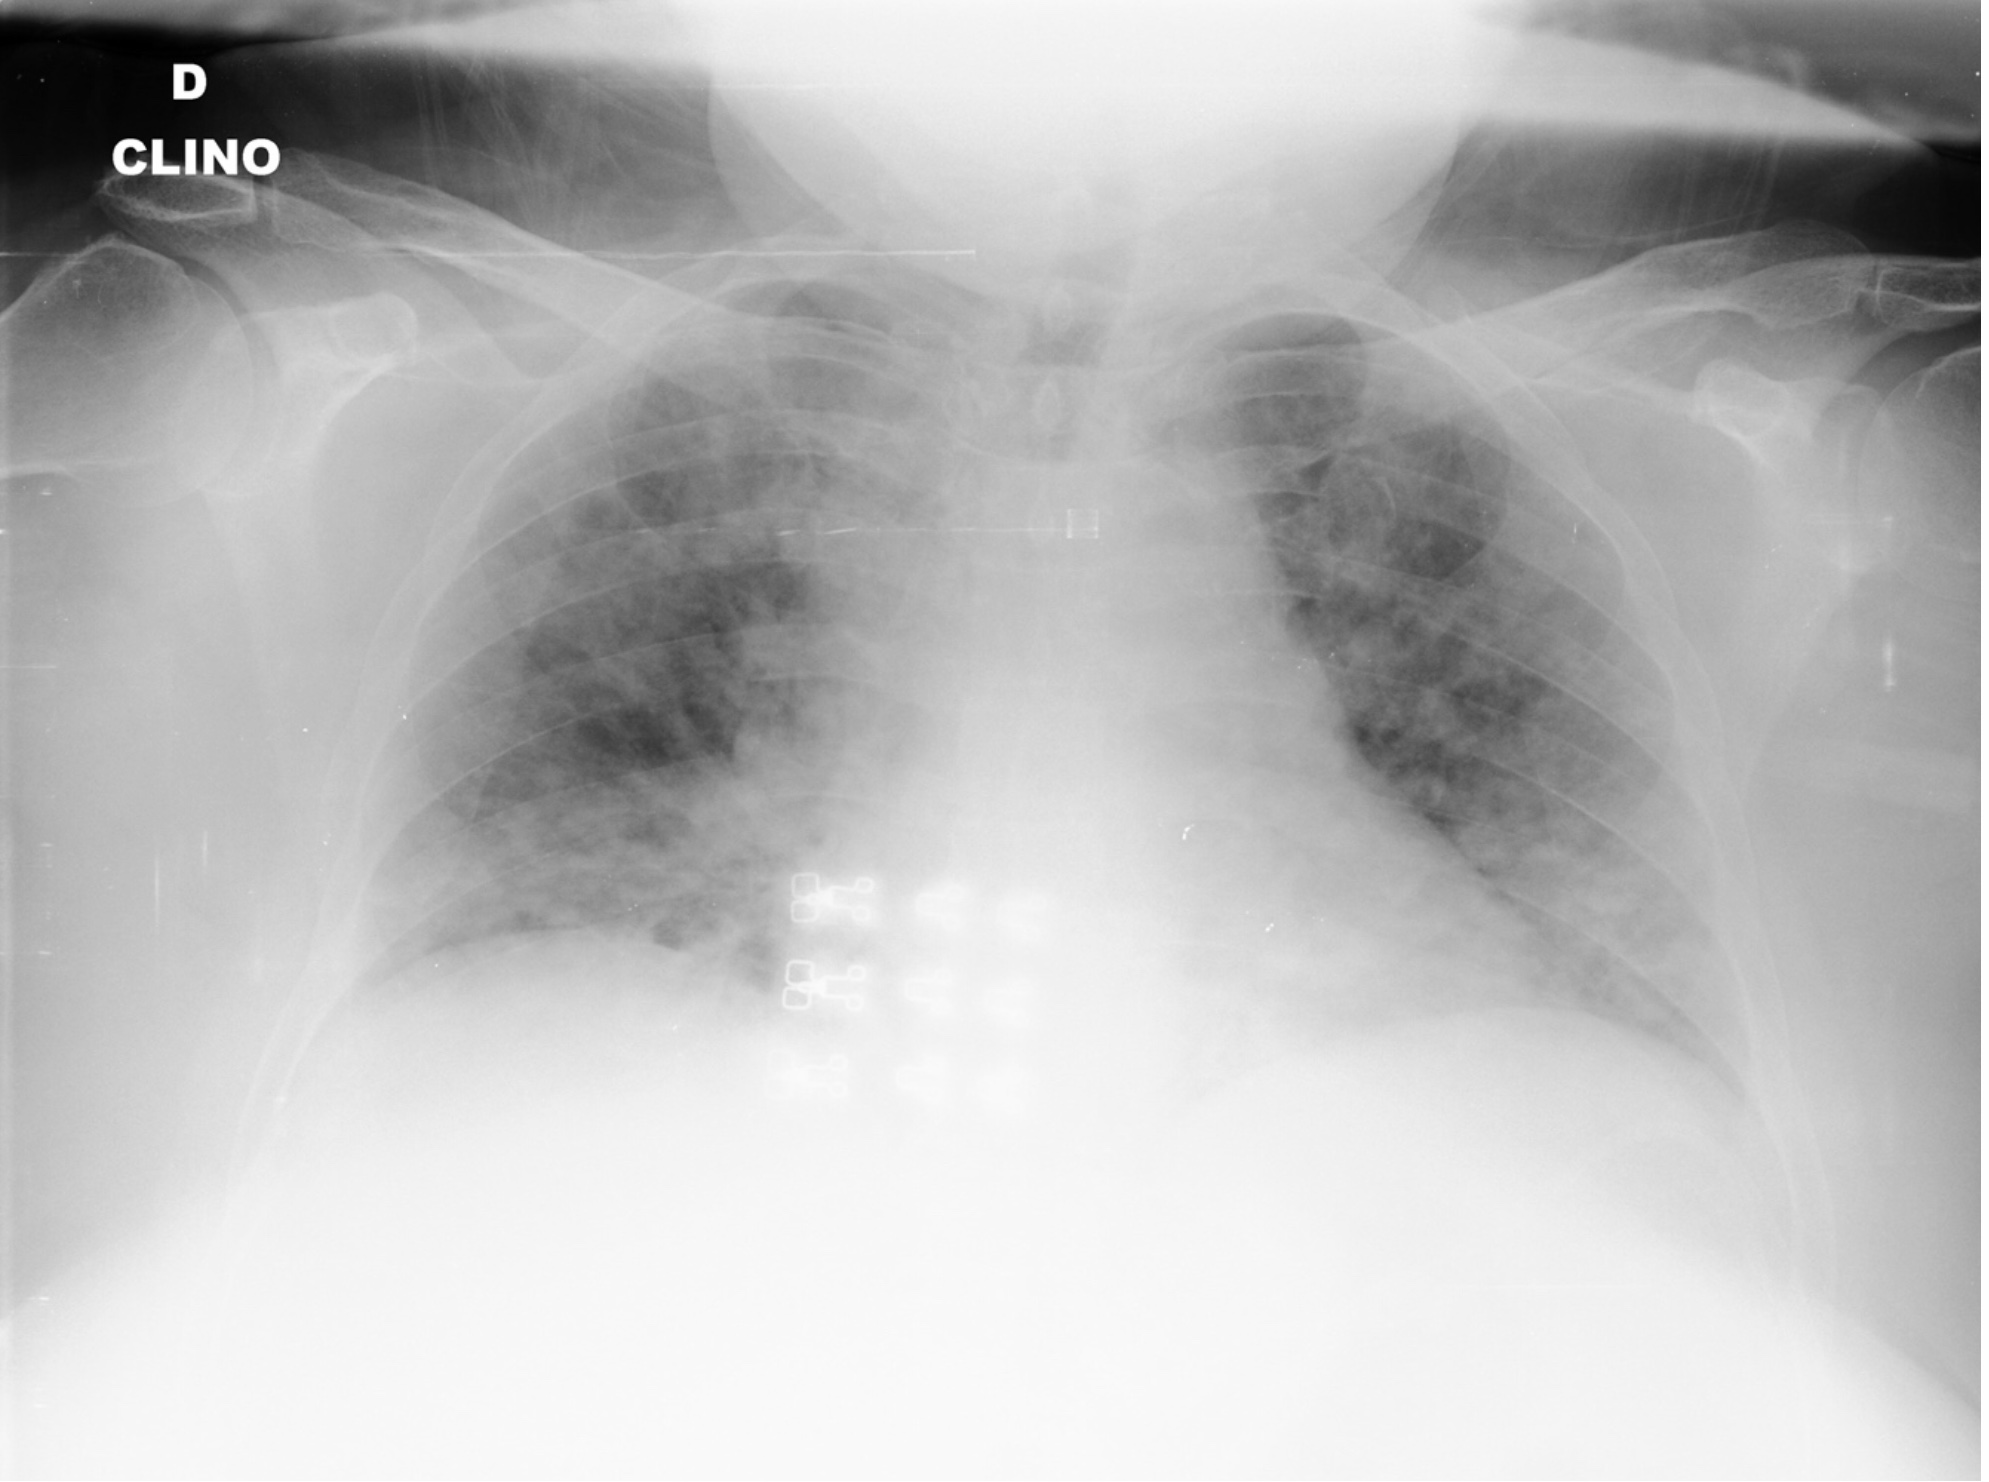

In [25]:
img = Image.open('covid/images/01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg')
display(img)

In [26]:
transform = get_transforms(max_rotate=15, max_lighting=0.2)

In [27]:
data = ImageDataBunch.from_df(path = '',
                             df=df_main,
                             fn_col = 'filename',
                             valid_pct = 0.3,
                              ds_tfms = transform,
                              size =224,
                              label_col = 'finding')
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (257 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
COVID-19,COVID-19,COVID-19,COVID-19,COVID-19
Path: .;

Valid: LabelList (110 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
NORMAL,NORMAL,NORMAL,NORMAL,NORMAL
Path: .;

Test: None

In [28]:
print(f'Number of samples for Training: {len(data.train_ds)}')
print(f'Number of samples for Validation: {len(data.valid_ds)}')

Number of samples for Training: 257
Number of samples for Validation: 110


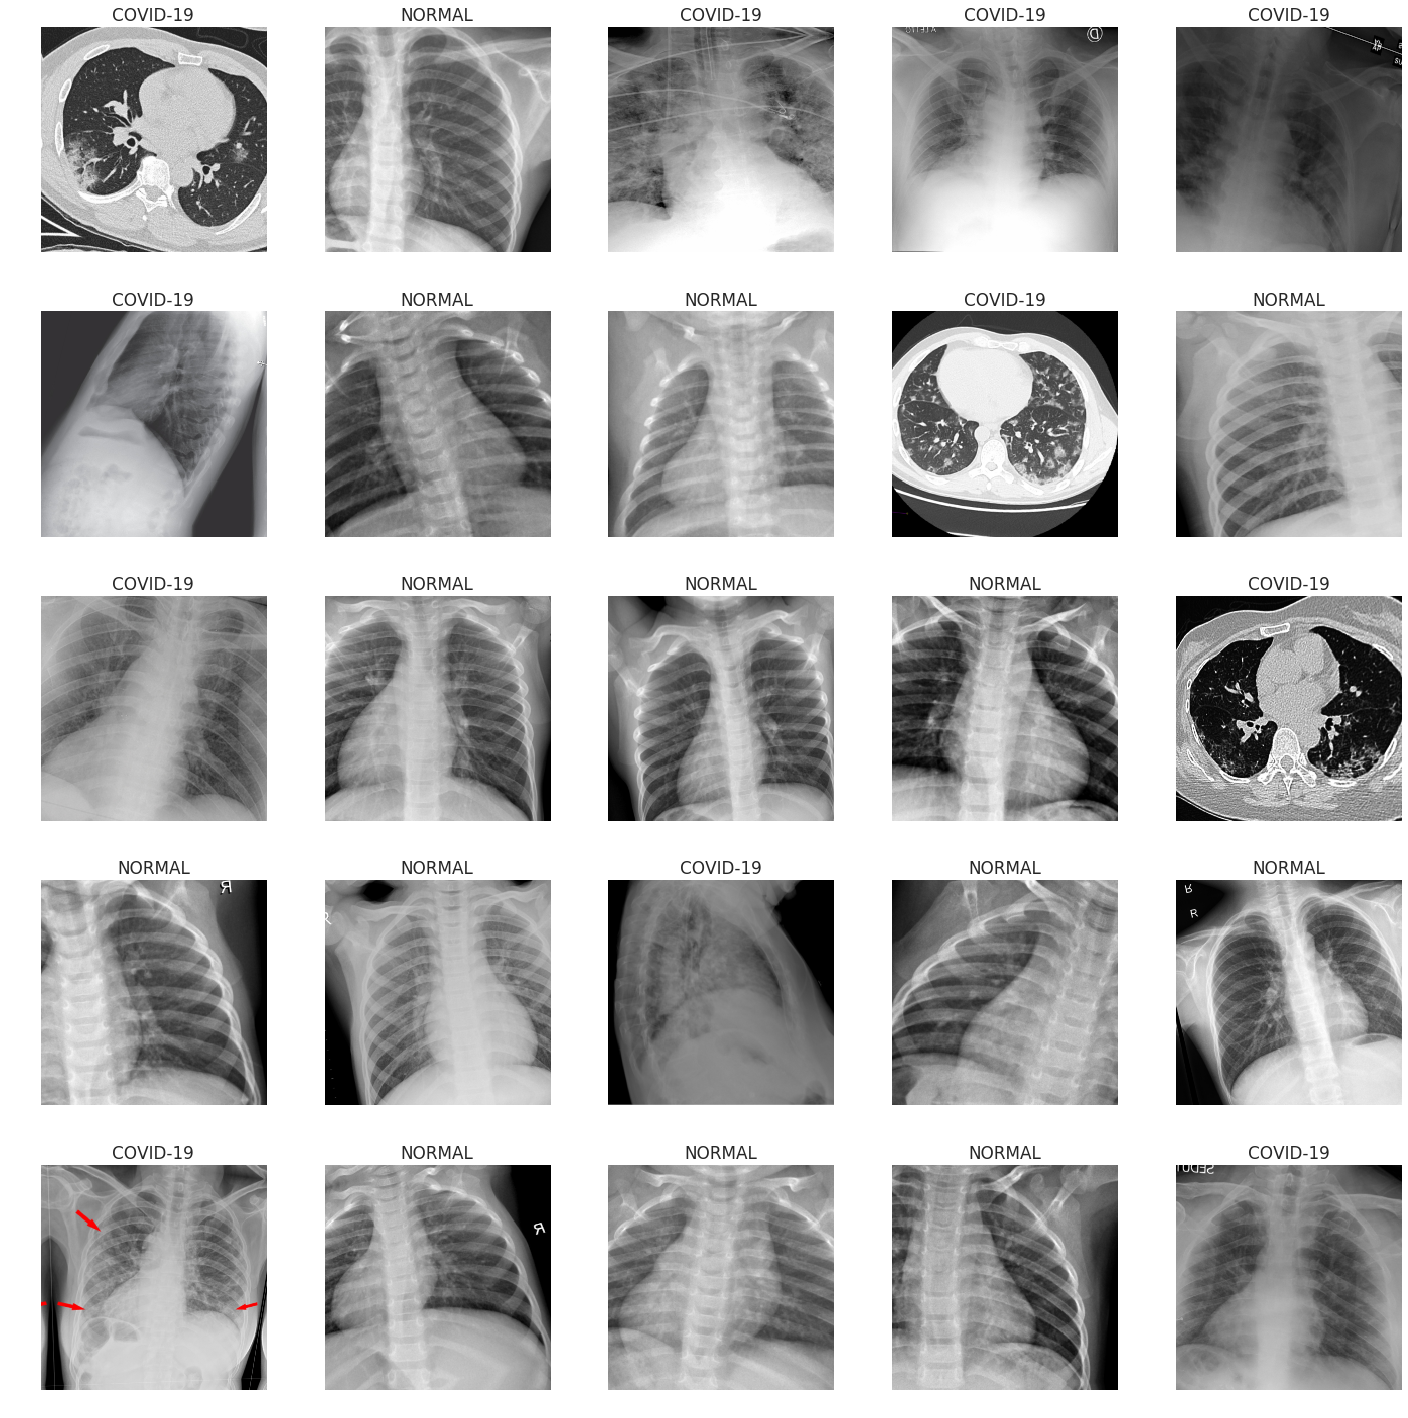

In [29]:
data.show_batch()

In [30]:
model = cnn_learner(data = data,
                    base_arch=models.resnet34, metrics = [accuracy])

In [31]:
model.fit_one_cycle(cyc_len=8)

epoch,train_loss,valid_loss,accuracy,time
0,1.276757,0.520919,0.745455,00:17
1,0.795271,0.355340,0.900000,00:14
2,0.567971,0.291047,0.909091,00:14
3,0.457854,0.173800,0.954545,00:14
4,0.359752,0.085113,0.972727,00:14
5,0.294945,0.049125,0.972727,00:14
6,0.247838,0.042047,0.990909,00:14
7,0.212191,0.039828,0.981818,00:15


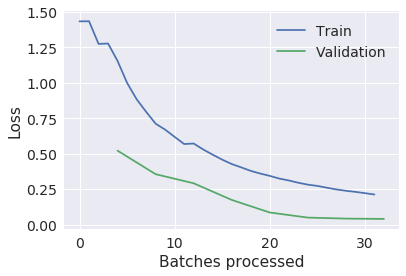

In [32]:
model.recorder.plot_losses()

In [33]:
model.unfreeze()

In [34]:
model.fit_one_cycle(cyc_len=10)

epoch,train_loss,valid_loss,accuracy,time
0,0.041630,0.033566,0.990909,00:15
1,0.041892,1.619465,0.663636,00:14
2,0.084272,7.922742,0.409091,00:15
3,0.126068,4.831551,0.572727,00:15
4,0.104011,0.386795,0.945455,00:14
5,0.097297,0.286348,0.945455,00:15
6,0.098592,0.054177,0.990909,00:16
7,0.084230,0.070437,0.990909,00:15
8,0.077973,0.069912,0.990909,00:15
9,0.070115,0.070543,0.990909,00:14


In [35]:
model.save('resnet34-COVID-19')

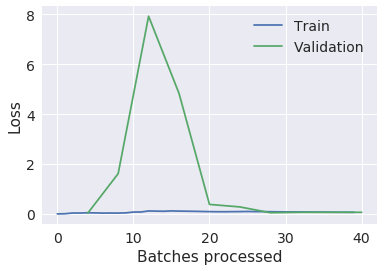

In [36]:
model.recorder.plot_losses()

In [37]:
interp = ClassificationInterpretation.from_learner(model)

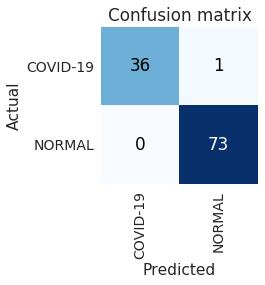

In [38]:
interp.plot_confusion_matrix()

### KUDOS WE TRAINED A MODEL WITH ONLY 1 MISTAKE.
- Let's Plot the only missed image below.

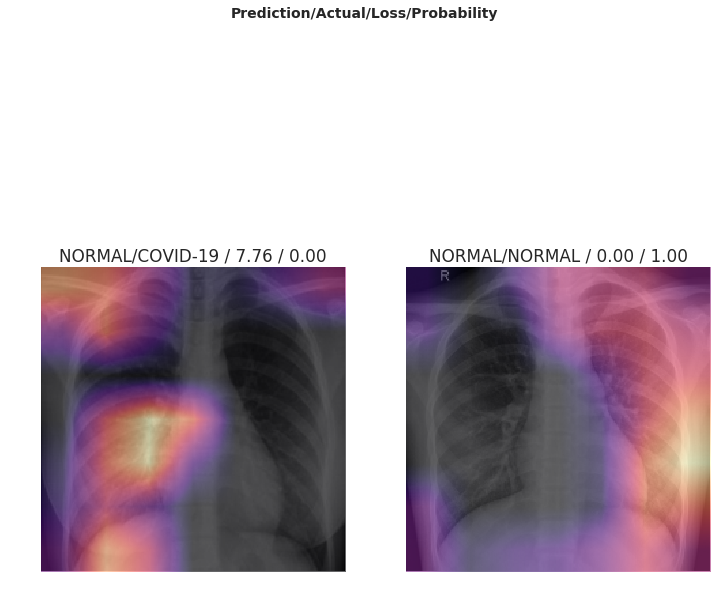

In [40]:
interp.plot_top_losses(k=2,heatmap=True)

#### Heatmap shows the area where our Model is looking in these pictures. 
- The left image is the only image predicted wrongly. 

In [43]:
model.export('COVID-19.pkl')